In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Outcome'])
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
clf = LogisticRegression(max_iter = 1000, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Logistic Regression:\n",
      "Accuracy: ", accuracy_score(y_test, y_pred), "\n",
      "Precision: ", precision_score(y_test, y_pred), "\n",
      "Recall: ", recall_score(y_test, y_pred), "\n",
      "F1: ", f1_score(y_test, y_pred))

Logistic Regression:
 Accuracy:  0.7748917748917749 
 Precision:  0.7301587301587301 
 Recall:  0.5679012345679012 
 F1:  0.6388888888888888


In [5]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print("Decision Tree:\n", 
      "Accuracy: ", accuracy_score(y_test, y_pred_tree), "\n",
      "Precision: ", precision_score(y_test, y_pred_tree), "\n",
      "Recall: ", recall_score(y_test, y_pred_tree), "\n",
      "F1: ", f1_score(y_test, y_pred_tree))

Decision Tree:
 Accuracy:  0.7012987012987013 
 Precision:  0.573170731707317 
 Recall:  0.5802469135802469 
 F1:  0.5766871165644172


Логистическая регрессия превосходит решающее дерево по всем метрикам, кроме Recall. Она подходит лучше.

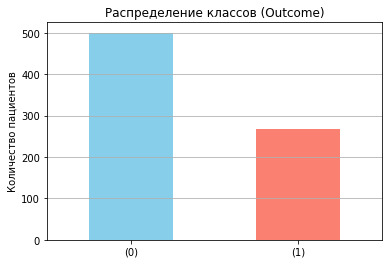

In [6]:
class_counts = df['Outcome'].value_counts()
class_counts.plot(kind='bar', color=["skyblue", "salmon"])
plt.xticks([0, 1], ['(0)', '(1)'], rotation=0)
plt.title("Распределение классов (Outcome)")
plt.ylabel("Количество пациентов")
plt.grid(axis='y')
plt.show()

Видим, что классы несбалансированы, следовательно, нужно выбрать F1 score, т.к она наиболее эффективна для несбалансированных классов.

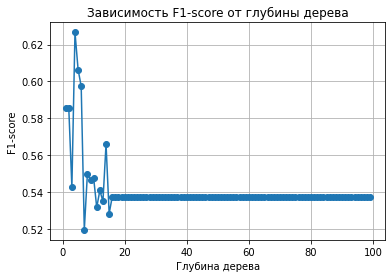

In [7]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

depths = range(1, 100)
f1_scores = []

max_depth = 0
max_f1 = 0
for d in depths:
    tree = DecisionTreeClassifier(max_depth=d, random_state=42)
    tree.fit(X_train, y_train)
    pred = tree.predict(X_test)
    score = f1_score(y_test, pred)
    f1_scores.append(score)
    
    if score > max_f1:
        max_f1 = score
        max_depth = d

plt.plot(depths, f1_scores, marker='o')
plt.xlabel("Глубина дерева")
plt.ylabel("F1-score")
plt.title("Зависимость F1-score от глубины дерева")
plt.grid()
plt.show()

In [9]:
import graphviz
from sklearn import tree

optimal_tree = DecisionTreeClassifier(max_depth=max_depth)
optimal_tree.fit(X_train, y_train)

dot_data = tree.export_graphviz(optimal_tree, out_file=None, 
                                feature_names=df.columns[:-1],
                                class_names=["0", "1"],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph.render()

ExecutableNotFound: ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH